#Facies Classifiaction project

importing libraries

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb



Importing Data

In [154]:
df = pd.read_csv("/content/sample_data/facies_vector_screen.csv")
df.head(5)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


Rename columns name

In [155]:
df.rename(columns={"GR" : "Gamma ray", "ILD_log10":"Resistivity", "PE":"Photoelectric effect", "DeltaPHI":"Neutron-density porosity difference","PHIND":"Average neutron-density porosity", "NM_M": "Nonmarine/marine indicator", "RELPOS" :"Relative position"},inplace = True)

Full NAN Data

In [159]:
df["Photoelectric effect"].fillna(df["Photoelectric effect"].mean(), inplace=True)
df.isna().sum()

<ipython-input-159-4be14728669c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Photoelectric effect"].fillna(df["Photoelectric effect"].mean(), inplace=True)


,0
Facies,0
Formation,0
Well Name,0
Depth,0
Gamma ray,0
Resistivity,0
Neutron-density porosity difference,0
Average neutron-density porosity,0
Photoelectric effect,0
Nonmarine/marine indicator,0


ploting Facies Proportion by Well

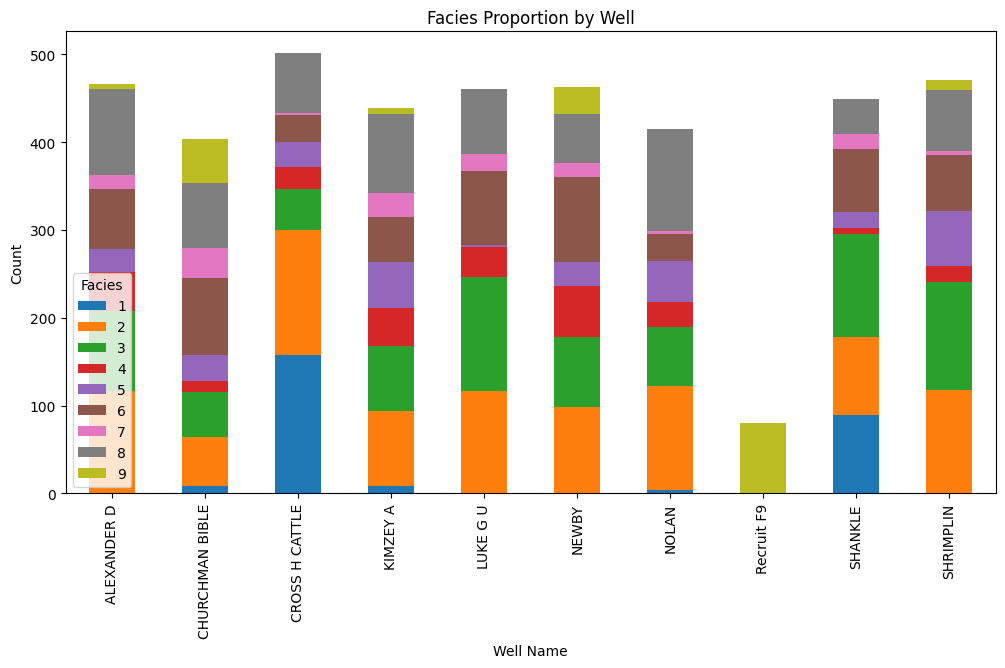

In [160]:
facies_counts = df.groupby(['Well Name', 'Facies']).size().unstack()
facies_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Facies Proportion by Well')
plt.xlabel('Well Name')
plt.ylabel('Count')
plt.legend(title='Facies')
plt.show()

Change object to integer

In [161]:
new_formation = LabelEncoder()
df["new Formation"] = new_formation.fit_transform(df["Formation"])
new_well = LabelEncoder()
df["new Well Name"] = new_well.fit_transform(df["Well Name"])

Split x,y

In [ ]:
x = df.drop(columns = ["Facies", "Formation", "Well Name", "new Formation", "new Well Name"])
y = df["Facies"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

support vector machine algorithm

In [162]:
from sklearn import svm

In [163]:
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [164]:
svm_predictions = svm_classifier.predict(X_test)

In [165]:
svm_accurcy = accuracy_score(svm_predictions, y_test)
print(svm_accurcy)

0.2469879518072289


random forest classifier

In [166]:
RND_CLS = RandomForestClassifier(n_estimators=100, random_state=42)
RND_CLS.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [167]:
RND_CLS_predictions = RND_CLS.predict(X_test)
RND_CLS_accurcy = accuracy_score(RND_CLS_predictions, y_test)
print(RND_CLS_accurcy)

0.7855421686746988


KNN algorithm

([<matplotlib.axis.XTick at 0x7fa3bae7ce90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

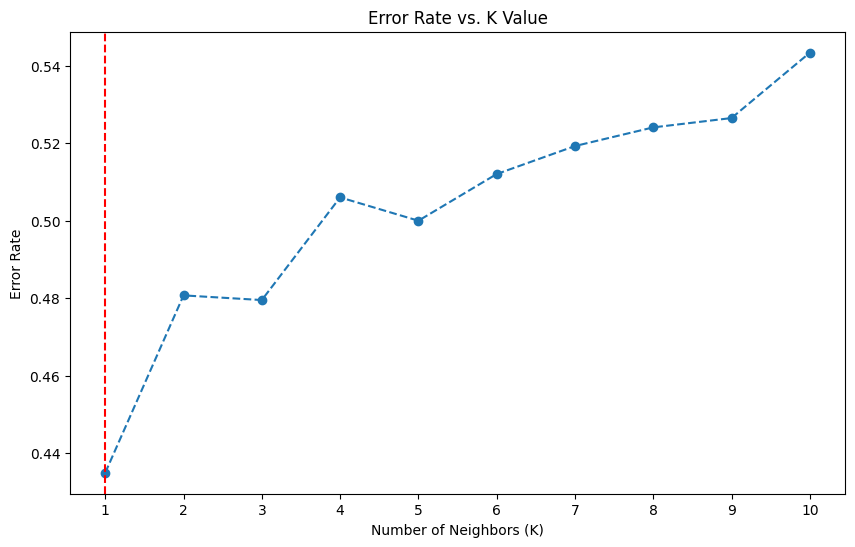

In [168]:
error_rates = []
k_values = range(1, 11)  # Testing odd K values from 1 to 10

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy')
    error_rates.append(1 - cv_scores.mean())

optimal_k = k_values[np.argmin(error_rates)]

plt.figure(figsize=(10,6))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed')
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.title('Error Rate vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.xticks(k_values)

In [169]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [170]:
knn_predictions = knn.predict(X_test)
knn_accurcy = accuracy_score(knn_predictions, y_test)
print(knn_accurcy)

0.7096385542168675
